# Automobile Sales prediction

## BUSINESS CONTEXT:
Business problem definition - One of major automobile company would like to design new product which gives high sales. Inorder to define the product, they want to understand and identify important drivers for the sales(what are the factors driving sales) and Predict the new car sales for given car model with defined factors.

### Expectations from the Trainees:

1.	Understand the data & perform the data preparation before the model building
2.	Perform all the modeling steps including pre & post modeling steps like data preparation and implementation of the model
3.	Understand output and explain the model fit
4.	Determine what is the "best" linear model?
5.	Apply transformations to the given variables and find out the possible best model after transformations.
6.	Generate the final equation
7.	Validate the model and present the results in Excel or PPT.

#### DATA AVAILABLE:
	Car_sales.csv


#### Description of the Variables:

1.	Manufacturer - Car Manufacturer Name
2.	Model - Car Model Name
3.	Sales_in_thousands - Car Sales in Thousands
4.	    year_resale_value - Resale value after 4 years
5.	Vehicle_type - Type of car
6.	Price_in_thousands - Price of the car
7.	Engine_size - Car Engine Size
8.	Horsepower - Car Horse power
9.	Wheelbase - Car wheel base
10.	Width - Car Width
11.	Length - Car Length
12.	Curb_weight - Car Curb Weight
13.	Fuel_capacity - Fuel Capacity in liters
14.	Fuel_efficiency - Fuel efficiency (kms/per liter)
15.	Latest_Launch - Car Model Launch Date
16.	Power_perf_factor - Power performance factor


### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_oneway,f_regression,RFE,SelectKBest
from sklearn.ensemble import RandomForestRegressor
import itertools
from sklearn.linear_model import LinearRegression

### Import the dataset

In [2]:
df = pd.read_csv('Car_sales.csv')

### Data Understanding

In [3]:
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
df.shape

(157, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [6]:
report = pandas_profiling.ProfileReport(df)
#report.to_file('report.html')

### Data Visualization

In [7]:
# Drop unique values and multicolinearity
df.drop(['Model', 'Latest_Launch' ],axis = 1, inplace = True)

In [8]:
# sns.pairplot(df)
# plt.show()

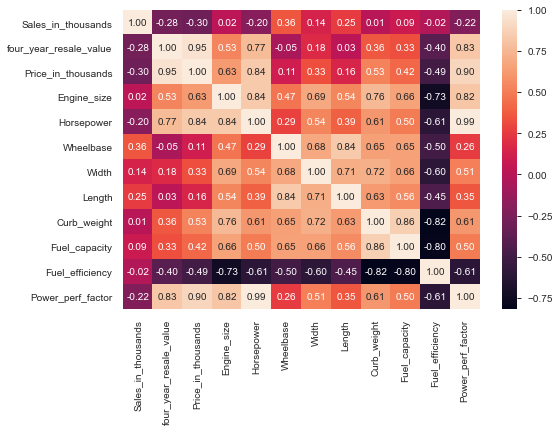

In [9]:
cor = df.corr()
sns.heatmap(cor, annot=True, fmt = '.2f')
plt.show()

In [10]:
# Drop  multicolinearity(cutoff is 0.8)
df.drop(['four_year_resale_value', 'Horsepower', 'Engine_size', 'Power_perf_factor', 'Fuel_efficiency', 'Curb_weight' ],axis = 1, inplace = True)

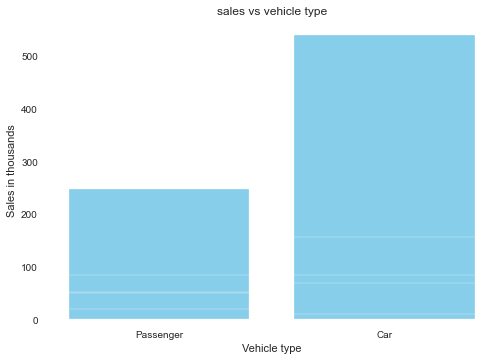

In [11]:
plt.bar(x = 'Vehicle_type', height = 'Sales_in_thousands',data = df, color = 'skyblue')
plt.title('sales vs vehicle type')
plt.xlabel('Vehicle type')
plt.ylabel('Sales in thousands')
plt.show()

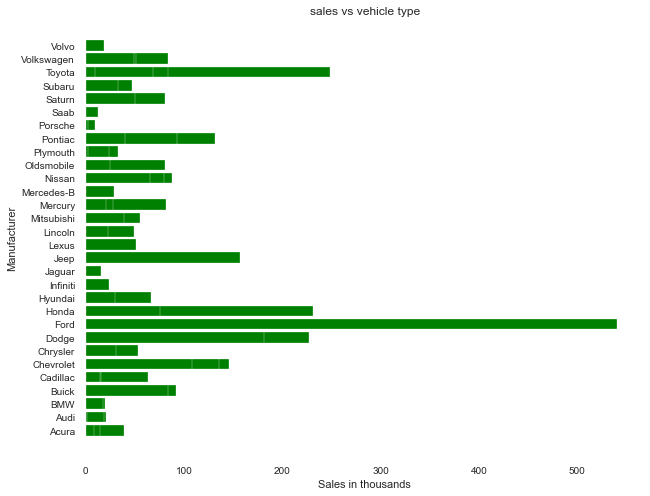

In [12]:
plt.figure(figsize=(10,8))
plt.barh(y = 'Manufacturer', width = 'Sales_in_thousands' ,data = df, color = 'green')
plt.title('sales vs vehicle type')
plt.ylabel('Manufacturer')
plt.xlabel('Sales in thousands')
plt.show()

In [13]:
df.Manufacturer[df.Manufacturer == 'Mercedes-B'] = 'Mercedes'

C:\Users\Shyam prasath\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Data preprocessing

In [14]:
# Seperate cat and cont variables
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')

In [15]:
df_cat.isnull().sum()

Manufacturer    0
Vehicle_type    0
dtype: int64

In [16]:
df_cat.Manufacturer.value_counts()

Ford          11
Dodge         11
Mercedes       9
Chevrolet      9
Toyota         9
Chrysler       7
Mitsubishi     7
Nissan         7
Lexus          6
Volkswagen     6
Pontiac        6
Mercury        6
Volvo          6
Oldsmobile     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Porsche        3
Audi           3
BMW            3
Jeep           3
Lincoln        3
Hyundai        3
Subaru         2
Saab           2
Infiniti       1
Jaguar         1
Name: Manufacturer, dtype: int64

In [17]:
# def binning(x):
#     if x['Manufacturer']  in ['Dodge']:
#         return 'Dodge'
#     elif x['Manufacturer']  in ['Ford']:
#         return 'Ford'
#     elif x['Manufacturer']  in ['Toyota']:
#         return 'Toyota'
#     elif x['Manufacturer']  in ['Mercedes-B']:
#         return 'Mercedes_B'
#     elif x['Manufacturer']  in ['Chevrolet']:
#         return 'Chevrolet'
#     else:
#         return 'others'


# df_cat['Manufacturer'] = df_cat.apply(binning, axis = 1)

In [18]:
df_num.isnull().sum()

Sales_in_thousands    0
Price_in_thousands    2
Wheelbase             1
Width                 1
Length                1
Fuel_capacity         1
dtype: int64

In [19]:
def missing(x):
    x = x.fillna(x.std())
    return x

df_num = df_num.apply(missing)

In [20]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114,29.450,67.956,540.561
Price_in_thousands,157.0,27.224652,14.334618,9.235000,17.885,22.695,31.930,85.500
Wheelbase,157.0,106.851218,11.023307,7.641303,103.000,107.000,112.200,138.700
Width,157.0,70.718802,6.405494,3.451872,68.400,70.500,73.400,79.900
Length,157.0,186.235871,19.284733,13.431754,177.500,187.800,196.100,224.500
Fuel_capacity,157.0,17.862343,4.034710,3.887921,15.800,17.200,19.500,32.000


In [21]:
def summary(x):
    return pd.Series([x.count(), x.mean(), x.median(), x.std(), x.min(), x.quantile(0.95), x.quantile(0.99), x.max()], 
                     index = ['count', 'mean', 'median', 'std', 'min', '95%', '99%', 'max'])

In [22]:
df_num.apply(summary).T

,count,mean,median,std,min,95%,99%,max
Sales_in_thousands,157.0,52.998076,29.450,68.029422,0.110000,185.3362,260.64532,540.561
Price_in_thousands,157.0,27.224652,22.695,14.334618,9.235000,55.2250,78.32720,85.500
Wheelbase,157.0,106.851218,107.000,11.023307,7.641303,119.2000,134.30000,138.700
Width,157.0,70.718802,70.500,6.405494,3.451872,78.2000,79.18800,79.900
Length,157.0,186.235871,187.800,19.284733,13.431754,208.5000,219.21600,224.500
Fuel_capacity,157.0,17.862343,17.200,4.034710,3.887921,25.4000,30.88000,32.000


In [23]:
def outliers(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [24]:
df_num = df_num.apply(outliers)

In [25]:
df2 = pd.concat([df_num, df_cat], axis = 1)

In [26]:
df2.head()

,Sales_in_thousands,Price_in_thousands,Wheelbase,Width,Length,Fuel_capacity,Manufacturer,Vehicle_type
0,16.919,21.500000,101.2,67.3,172.4,13.2,Acura,Passenger
1,39.384,28.400000,108.1,70.3,192.9,17.2,Acura,Passenger
2,14.114,14.351653,106.9,70.6,192.0,17.2,Acura,Passenger
3,8.588,42.000000,114.6,71.4,196.6,18.0,Acura,Passenger
4,20.397,23.990000,102.6,68.2,178.0,16.4,Audi,Passenger


### convert cat cols into dummies

In [27]:
df2 = pd.get_dummies(df2, ['Manufacturer', 'Vehicle_type'], drop_first=True)

In [28]:
df2.head()

,Sales_in_thousands,Price_in_thousands,Wheelbase,Width,Length,Fuel_capacity,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,21.500000,101.2,67.3,172.4,13.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,39.384,28.400000,108.1,70.3,192.9,17.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14.114,14.351653,106.9,70.6,192.0,17.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8.588,42.000000,114.6,71.4,196.6,18.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,23.990000,102.6,68.2,178.0,16.4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Pre modelling

### Assumptions of linear regression

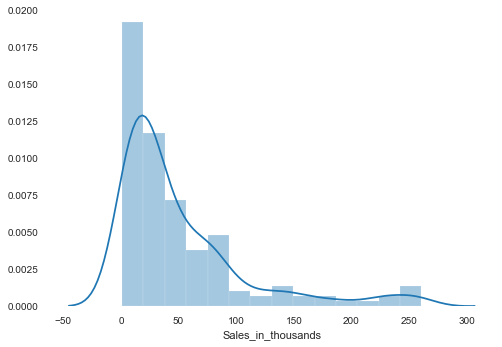

In [29]:
sns.distplot(df2.Sales_in_thousands)
plt.show()

In [30]:
df2['ln_Sales_in_thousands'] = np.log(df2['Sales_in_thousands'])

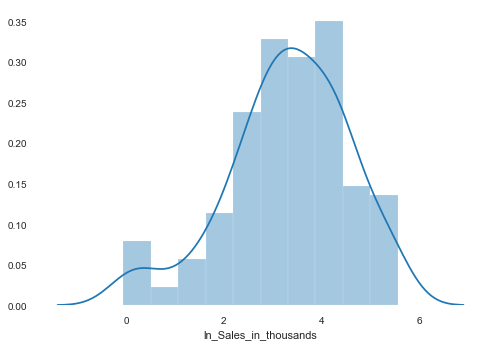

In [31]:
sns.distplot(df2.ln_Sales_in_thousands)
plt.show()

In [32]:
print(df2.columns)

Index(['Sales_in_thousands', 'Price_in_thousands', 'Wheelbase', 'Width',
       'Length', 'Fuel_capacity', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Porsche', 'Manufacturer_Saab',
       'Manufacturer_Saturn', 'Manufacturer_Subaru', 'Manufacturer_Toyota',
       'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_Sales_in_thousands'],
      dtype='object')


## Feature Engineering
### coefficient of variance(CV)

In [33]:
cv_vars = df2.apply(lambda x : np.mean(x)/np.std(x))
cv_vars

Sales_in_thousands          0.888413
Price_in_thousands          1.940491
Wheelbase                  14.361315
Width                      20.701283
Length                     13.891606
Fuel_capacity               4.661747
Manufacturer_Audi           0.139573
Manufacturer_BMW            0.139573
Manufacturer_Buick          0.161690
Manufacturer_Cadillac       0.181369
Manufacturer_Chevrolet      0.246598
Manufacturer_Chrysler       0.216025
Manufacturer_Dodge          0.274486
Manufacturer_Ford           0.274486
Manufacturer_Honda          0.181369
Manufacturer_Hyundai        0.139573
Manufacturer_Infiniti       0.080064
Manufacturer_Jaguar         0.080064
Manufacturer_Jeep           0.139573
Manufacturer_Lexus          0.199337
Manufacturer_Lincoln        0.139573
Manufacturer_Mercedes       0.246598
Manufacturer_Mercury        0.199337
Manufacturer_Mitsubishi     0.216025
Manufacturer_Nissan         0.216025
Manufacturer_Oldsmobile     0.199337
Manufacturer_Plymouth       0.161690
M

> All the cv values are greater than 0.05, so that there is no variable need to be dropped

### RFE

In [34]:
feature = df2[df2.columns.difference(['Sales_in_thousands', 'ln_Sales_in_thousands'])]
target = df2['ln_Sales_in_thousands']

In [35]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=10).fit(feature,target)

In [36]:
feature.columns[rfe.support_]

Index(['Fuel_capacity', 'Length', 'Manufacturer_Ford',
       'Manufacturer_Mitsubishi', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width'],
      dtype='object')

### Seleck KBest

In [37]:
skb = SelectKBest(f_oneway, k= 10).fit(feature,target)

In [38]:
feature.columns[skb.get_support()]

Index(['Fuel_capacity', 'Length', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Lincoln', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Subaru', 'Wheelbase', 'Width'],
      dtype='object')

### F-Regressor

In [39]:
F_value,P_value = f_regression(feature,target)

In [40]:
itertools.zip_longest(feature.columns, F_value, P_value)

In [41]:
f_reg = [(i,v,z) for i,v,z in itertools.zip_longest(feature.columns, F_value, ['%.3f' %p for p in P_value])]

In [42]:
f_reg = pd.DataFrame(f_reg, columns=['feature', 'F_value', 'P_value'])
f_reg.sort_values(by = 'P_value', ascending = True)

,feature,F_value,P_value
31,Price_in_thousands,76.607843,0.000
9,Manufacturer_Ford,21.061447,0.000
24,Manufacturer_Porsche,10.653178,0.001
33,Wheelbase,11.306997,0.001
32,Vehicle_type_Passenger,12.462157,0.001
17,Manufacturer_Mercedes,9.878573,0.002
1,Length,5.853881,0.017
30,Manufacturer_Volvo,3.934501,0.049
10,Manufacturer_Honda,3.852349,0.051
28,Manufacturer_Toyota,3.417935,0.066


In [43]:
f_reg[P_value <= 0.05].feature.values

array(['Length', 'Manufacturer_Ford', 'Manufacturer_Mercedes',
       'Manufacturer_Porsche', 'Manufacturer_Volvo', 'Price_in_thousands',
       'Vehicle_type_Passenger', 'Wheelbase'], dtype=object)

 > Remove the columns which are having high pvalue (ie pvalue > 0.05)

In [77]:
### From the above feature engineerings steps take only the unique columns
final_list = ['Fuel_capacity', 
              'Length',
              'Manufacturer_Ford',
              'Manufacturer_Honda',
              'Manufacturer_Mitsubishi',
              'Manufacturer_Oldsmobile',
              'Manufacturer_Plymouth',
              'Price_in_thousands', 
              'Wheelbase', 
              'Width',
              'Manufacturer_Infiniti',
              'Manufacturer_Jaguar', 
              'Manufacturer_Lincoln', 
              'Manufacturer_Porsche',
              'Manufacturer_Saab', 
              'Manufacturer_Subaru',
              'Manufacturer_Mercedes',
              'Vehicle_type_Passenger', 
              'Manufacturer_Volvo',
            ]

x = feature[final_list]

### VIF

In [78]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.sort_values(by = 'vif_factor', ascending = False)

,vif_factor,features
8,1230.802017,Wheelbase
1,1205.328037,Length
9,583.768640,Width
0,94.811261,Fuel_capacity
7,12.315122,Price_in_thousands
17,10.168745,Vehicle_type_Passenger
16,1.636037,Manufacturer_Mercedes
13,1.396574,Manufacturer_Porsche
6,1.264929,Manufacturer_Plymouth
2,1.161471,Manufacturer_Ford


### model building

In [79]:
train,test = train_test_split(df2, test_size = 0.3, random_state = 123)

In [80]:
train.shape

(109, 37)

In [81]:
test.shape

(48, 37)

In [82]:
formula = 'ln_Sales_in_thousands~'+ '+'.join(x)
formula

'ln_Sales_in_thousands~Fuel_capacity+Length+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Mitsubishi+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Price_in_thousands+Wheelbase+Width+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Lincoln+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Subaru+Manufacturer_Mercedes+Vehicle_type_Passenger+Manufacturer_Volvo'

In [87]:
ols = smf.ols(formula='ln_Sales_in_thousands~Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Mitsubishi+Manufacturer_Plymouth+Price_in_thousands+Vehicle_type_Passenger+Manufacturer_Volvo'
, data = train).fit()

In [88]:
print(ols.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.607
Model:                               OLS   Adj. R-squared:                  0.580
Method:                    Least Squares   F-statistic:                     22.31
Date:                   Fri, 19 Jun 2020   Prob (F-statistic):           5.62e-18
Time:                           21:36:40   Log-Likelihood:                -131.51
No. Observations:                    109   AIC:                             279.0
Df Residuals:                        101   BIC:                             300.6
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

> Remove the variables having high p-value(0.05) and regenerate the model

Equation(y=mx+c)
y(sales_in_thousand) = 0.0661(fuel_efficiency)+ 0.0307(length)+ 0.9714(manufacturer_ford)- 0.0488(Price_in_thousand)
                            -1.0263(Vehicle_type_Passenger)-1.9430

### post modelling

In [52]:
train_predicted = np.exp(ols.predict(train))
test_predicted = np.exp(ols.predict(test))

In [53]:
train_actual = np.exp(train.ln_Sales_in_thousands)
test_actual = np.exp(test.ln_Sales_in_thousands)

In [54]:
train_rmse = np.sqrt(np.mean(np.square(train_actual - train_predicted)))
test_rmse = np.sqrt(np.mean(np.square(test_actual - test_predicted)))
print(train_rmse)
print(test_rmse)

43.14811127252909
66.12650746776002


In [55]:
train_mape = np.mean(np.abs(train_actual - train_predicted/train_actual))
test_mape = np.mean(np.abs(test_actual - test_predicted/test_actual))
print(train_mape)
print(test_mape)

55.341677016942995
38.39479196253749


In [56]:
np.corrcoef(train_actual, train_predicted)

array([[1.        , 0.73236186],
       [0.73236186, 1.        ]])

In [57]:
np.corrcoef(test_actual, test_predicted)

array([[1.        , 0.28694472],
       [0.28694472, 1.        ]])

### assumptions for errors

In [58]:

train_errors = train_actual - train_predicted
test_errors = test_actual - test_predicted

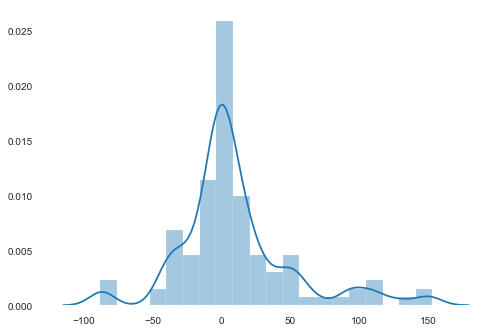

In [59]:
sns.distplot(train_errors)

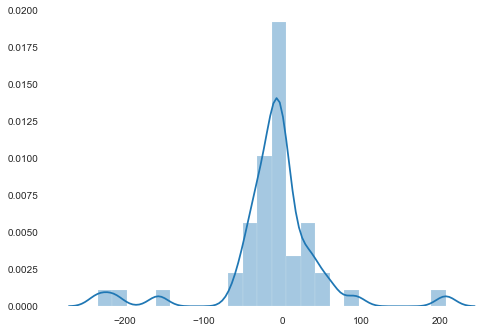

In [60]:
sns.distplot(test_errors)

In [61]:
np.corrcoef(train_actual, train_errors)

array([[1.        , 0.63201415],
       [0.63201415, 1.        ]])

### Decile Analysis

In [62]:
train_result = pd.concat([train_actual, train_predicted],axis = 1)
test_result = pd.concat([test_actual, test_predicted],axis = 1)

In [63]:
train_result.columns = ['actual', 'pred']
test_result.columns = ['actual', 'pred']

In [64]:
train_result['Deciles'] = pd.qcut(train_result['pred'],10, labels=False)
test_result['Deciles']=pd.qcut(test_result['pred'],10, labels=False)

In [65]:
train_result.groupby('Deciles')[['actual','pred']].mean()

,actual,pred
Deciles,,
0,7.378142,4.916072
1,19.384091,11.817518
2,18.776545,14.618334
3,24.393818,21.493639
4,53.285909,30.805342
5,53.193000,37.437628
6,45.567545,47.336012
7,70.277182,56.076111
8,97.867273,78.190847


In [66]:
test_result.groupby('Deciles')[['actual','pred']].mean()

,actual,pred
Deciles,,
0,10.33820,6.041609
1,14.15040,12.760834
2,29.02780,22.035351
3,33.78525,28.186192
4,49.59460,32.996146
5,33.85420,38.331149
6,77.22600,41.836694
7,50.34680,46.764773
8,27.72820,68.442717
